1
2


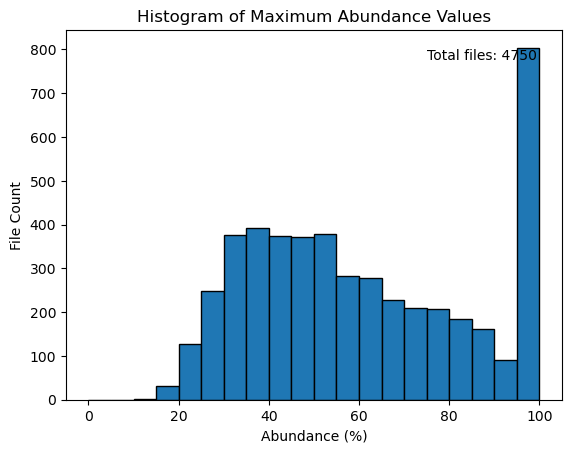

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 路径
directory = '/dm_data/zhaixp/20241203-dyn-ocean/bracken_output_many_seqs'
output_file = '/dm_data/zhaixp/20241203-dyn-ocean/most_common_microbes.txt'  # 输出文件路径
max_purities = []

print(1)
# 准备写入文件
with open(output_file, 'w') as output:
    print(2)
    output.write("Filename, Most Common Microbe, Abundance (%)\n")

    # 遍历目录中的所有文件
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)

            # 读取Bracken输出文件
            df = pd.read_csv(file_path, sep='\t')

            # 找出丰度最高的微生物及其丰度
            max_row = df.loc[df['fraction_total_reads'].idxmax()]
            most_common_microbe = max_row['name']
            abundance = max_row['fraction_total_reads'] * 100  # 乘以100转换为百分比

            # 写入文件
            output.write(f"{filename}, {most_common_microbe}, {abundance:.2f}%\n")

            # 用于直方图的纯度值
            #if most_common_microbe != "Escherichia":
            max_purities.append(abundance)

# 创建直方图
bins = np.arange(0, 105, 5)
plt.hist(max_purities, bins=bins, edgecolor='black')

# 设置标题和坐标标签
plt.title('Histogram of Maximum Abundance Values')
plt.xlabel('Abundance (%)')
plt.ylabel('File Count')

# 在图形的右上角添加文件总数
total_files = len(max_purities)
plt.text(0.95, 0.95, f'Total files: {total_files}', ha='right', va='top', transform=plt.gca().transAxes)

# 显示图形
plt.show()


In [5]:
import pandas as pd

# 读取保存的细菌数据
output_file = '/dm_data/zhaixp/20241129-dyn-ocean/most_common_microbes.txt'  # 之前保存的件路径
data = pd.read_csv(output_file, sep=', ')

# 统计每种细菌出现的次数
bacteria_counts = data['Most Common Microbe'].value_counts()

# 打印统计结果
print("Bacteria Occurrence Counts:")
print(bacteria_counts)


Bacteria Occurrence Counts:
Most Common Microbe
Staphylococcus             3322
Salmonella                 1635
Candidatus Pelagibacter    1180
Flavobacterium              781
Polaribacter                358
                           ... 
Oceanicola                    1
Plasmodium                    1
Parabacteroides               1
Desulfopila                   1
Tupanvirus                    1
Name: count, Length: 376, dtype: int64


/tmp/ipykernel_14998/790830955.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(output_file, sep=', ')
